In [1]:
# Import the requred packages and functionalities
import numpy as np
import pandas as pd

# Import LabelEncoder from the SciKit Learn library to
# encode the target labels with 0 to number of classes
# minus 1. In this task the target labels will be encoded 
# with the values 0 to 2.
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, silhouette_score

# Import the K-means clustering algorithm
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the iris dataset into a DataFrame
iris_df = pd.read_csv('Iris.csv')

In [3]:
# preview the dataframe
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


There are 150 entries with 1 dependent column and 5 feature columns.

In [4]:
# Detect any missing values.
# the function isnull() will return True if 
# a cell contains Nan or None. the function
# sum() will count the total missing values in
# each column.
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

From above we can see that no data cell contains a missing value.

In [5]:
# explore the dtypes within each column
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


All the columns have the correct data types assigned to them. The columns representing the sepal and petal characteristics have contain floats and the Species column data are objects. 

In [6]:
# View the description of the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Preprocessing

##### Scatter Plots

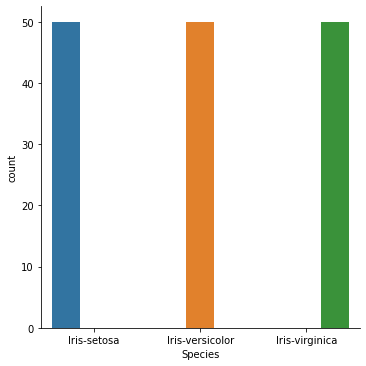

In [7]:
# plot the number of flowers in each species
sns.catplot(x='Species', kind = 'count', hue='Species', data = iris_df)

There is an equal amount of observations per Species within the iris dataset. 

Let's visualise six different scatter plots using different independent feature combinations. The scatter plots will assist in visualising how observations with similar properties are grouped and how observations with different properties are grouped from one another. 

Text(0.5, 1.0, 'Plot 1: Sepal length vs Sepal width')

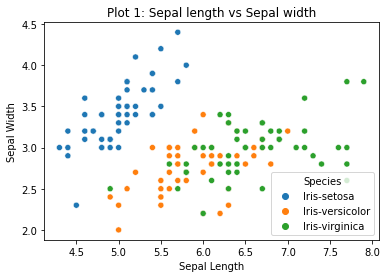

In [8]:
# Plot sepal length vs sepal width using the 
# scatterplot method from the seaborn library.
# set hue to 'Species' such that all observations
# are assigned a colur based on the species they 
# belong to.
sns.scatterplot(x ='SepalLengthCm', y = 'SepalWidthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Plot 1: Sepal length vs Sepal width')

Note that the observations are distinguishable from one another based on colour, thus we can easily see the 3 Iris Spcies. The species Iris-setosa is distinguishable from the other two species in the top left coner, whereas the other two species have formed one group in bottom right of the plot.

Text(0.5, 1.0, 'Plot 2: Sepal length vs Petal length')

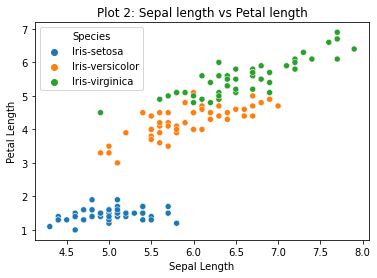

In [9]:
# Use the scatterplot method to plot sepal length
# against petal length.
# set hue = 'Species'
sns.scatterplot(x ='SepalLengthCm', y = 'PetalLengthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Plot 2: Sepal length vs Petal length')

The Iris-setosa observations are clustered in one group at the bottom left corner, with short petal and sepal length. The versicolor and virginica observations form another group, with longer petal and sepal length and overlap one another.

Text(0.5, 1.0, 'Plot 3: Sepal length vs Petal width')

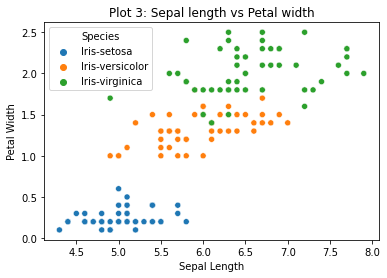

In [10]:
# Plot sepal length vs petal width
# Set hue to 'Species'
sns.scatterplot(x ='SepalLengthCm', y = 'PetalWidthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Plot 3: Sepal length vs Petal width')

The Iris-setosa observations are clustered in one group at the bottom left corner, with short petal width and sepal length. The versicolor and virginica observations form another group at the top of the plot, with longer petal width and sepal length, the obsevations do not overlap one another.

Text(0.5, 1.0, 'Plot 4: Sepal width vs Petal length')

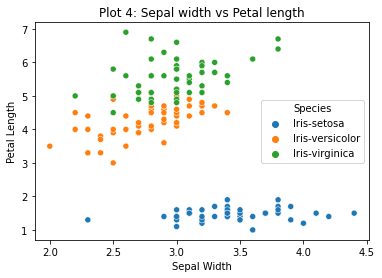

In [11]:
# Plot a scatter plot using the seaborn library
# plot sepal width against petal length
# Set hue = 'Species'
sns.scatterplot(x ='SepalWidthCm', y = 'PetalLengthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Plot 4: Sepal width vs Petal length')

The Iris-setosa observations are clustered in one group at the bottom right corner, with short petal length and long sepal width. The versicolor and virginica observations form another group, with longer petal length and shorter sepal width, and overlap one another.

Text(0.5, 1.0, 'Plot 5: Sepal width vs Petal width')

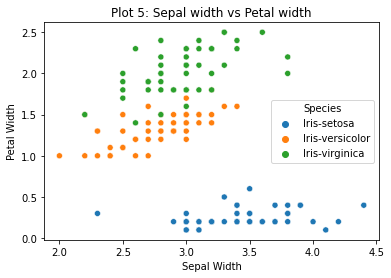

In [12]:
# Plot a scatter plot using the seaborn library
# plot sepal width against petal width
# Set hue = 'Species'
sns.scatterplot(x ='SepalWidthCm', y = 'PetalWidthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Plot 5: Sepal width vs Petal width')

The Iris-setosa observations are clustered in one group at the bottom right corner, with short petal width and long sepal width. The versicolor and virginica observations form another group in the top left corner, loger petal widths and shorter sepal widths, and do not overlap one another.

Text(0.5, 1.0, 'Plot 6: Petal width vs Petal length')

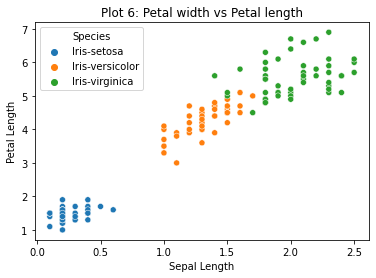

In [13]:
# Plot a scatter plot using the seaborn library
# plot petal width against petal length
# Set hue = 'Species'
sns.scatterplot(x ='PetalWidthCm', y = 'PetalLengthCm', hue='Species', data=iris_df)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Plot 6: Petal width vs Petal length')

The Iris-setosa observations are clustered in one group at the bottom left corner, with short petal and sepal lengths. The versicolor and virginica observations form another group, with longer petal and sepal lengths, and overlap one another.

From all six plots above, plot 3 (plot sepal length against petal width) and 5 (plot sepal width against petal width) are more promising to separate into clusters becuase there are no observations that overlap one another.

### K-means models

Build a K-means model for the following pairs of features; sepal length and petal width, sepal width and petal width. 

K-means is an unsupervised machine learning technique, therefore we do not need to split the dataset into training and testing sets and nor do we need to define a target avariable.

In [14]:
# Define the training data for the k-means model.
# The first pair of features is sepal length and
# petal width.
X = iris_df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values

#View the shape of the training data
X.shape

(150, 4)

In [15]:
# Create the kmeans classifier
# Set the number of clusters to 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init=10, random_state=0)

# predict the y_kmeans
y_kmeans = kmeans.fit_predict(X)

#view the predicted labels
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


The Elbow method enables us to select the optimum number of clusters for classification. Let's use the elbow method to visualise if the n_clusters = 3 is the optimum number of clusters to use.

C:\Users\natacha\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


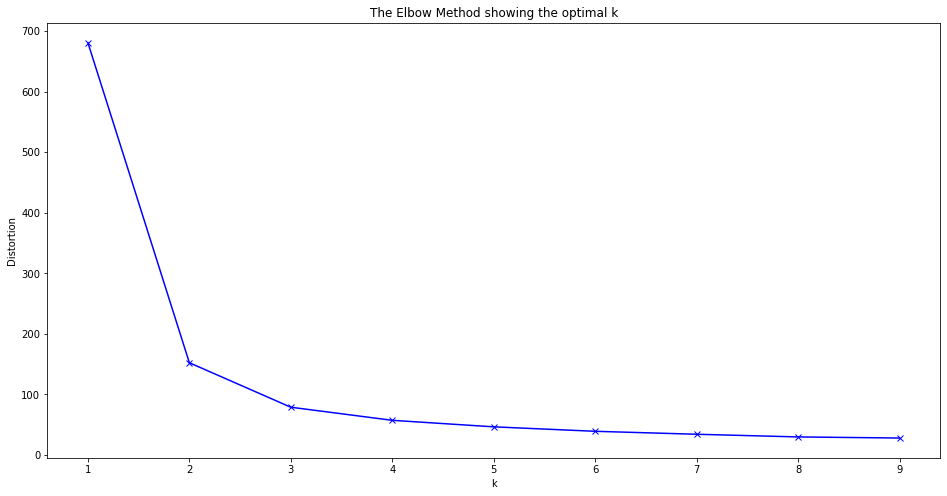

In [23]:
# k means determine k
distortions = []

# Define the range for the number of clusters
K = range(1,10)
for k in K:
    # initialise a KMeans model with k clusters
    kmeanModel = KMeans(n_clusters=k)
    
    # fit the model with X
    kmeanModel.fit(X)
    
    # append the average of the squared distances from
    # the cluster centers
    distortions.append(kmeanModel.inertia_)

# define the size of the plot
plt.figure(figsize=(16,8))
# Define the x-axis to be k, the number of clusters
# and the y-axis the distortion,
# use 'blue x' as point color markers.
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot above, the elbow, the point of inflection of the curve appears where K = 3. Hence the chosen number of cluster of 3 is otimal.

In [25]:
# Calculate the Silhoutte score of the KMeans model
score = silhouette_score(X, y_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


The silhouette score falls within the range -1 and 1. A score of 1 means that each data point i is assigned correctly to a cluster and far away from data point j which is in its own cluster. A score of -1. The closer to 0 the score is the more data point will overlap. The score 0.553 is positive and closer to 1 than 0, that is some data points may overlap, but more than half of the data points have been assigned to a cluster.

#### Scatter plots

Plot two scatter plots; Sepal length vs petal width and sepal width vs petal width.

Text(0.5, 1.0, 'Sepal width vs Petal width')

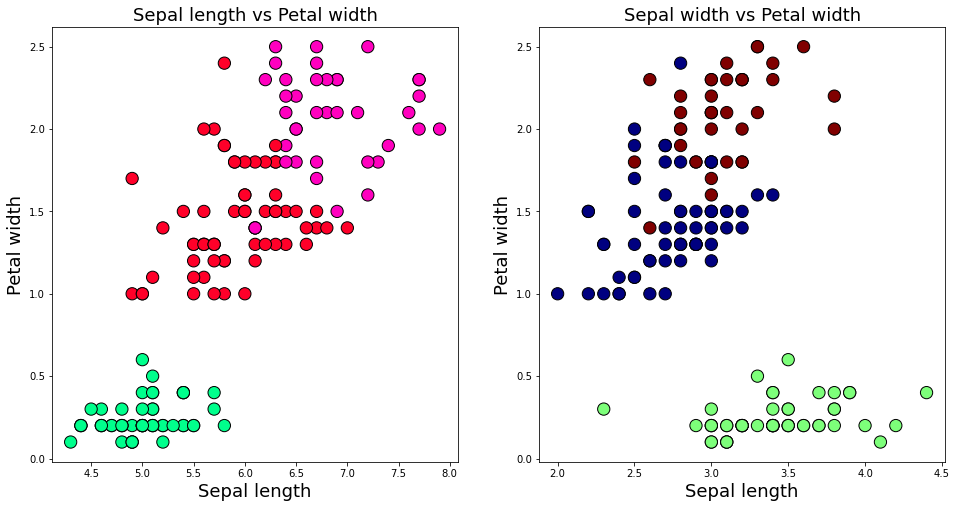

In [16]:
# Define teh axes for the two scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# the first plot indicates sepal length vs petal width
# choose the first column in X and the fourth
axes[0].scatter(X[:, 0], X[:, 3], c=y_kmeans, cmap='gist_rainbow',
edgecolor='k', s=150)

# the second plot indicates sepal width vs petal width
axes[1].scatter(X[:, 1], X[:, 3], c=y_kmeans, cmap='jet',
edgecolor='k', s=150)

# define the axis labels for the first plot
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)

# define the axis label for the second plot
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)

# Define the title for the first plot
axes[0].set_title('Sepal length vs Petal width', fontsize=18)

# Define the title for the second plot
axes[1].set_title('Sepal width vs Petal width', fontsize=18)

#### Bibliography

1. LabelEncoder implementation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

2. Cluster Analysis - https://pythonmachinelearning.pro/cluster-analysis-python-tutorial/

3. In Depth: k-Means CLustering - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html